In [1]:
import numpy as npp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df=pd.read_csv("student.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df.fillna(df.median(numeric_only=True),inplace=True)
df.fillna("Unknown",inplace=True)

In [11]:
df.columns=df.columns.str.replace('[^a-zA-Z0-9_]','',regex=True)

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    df[col]=LabelEncoder().fit_transform(df[col])

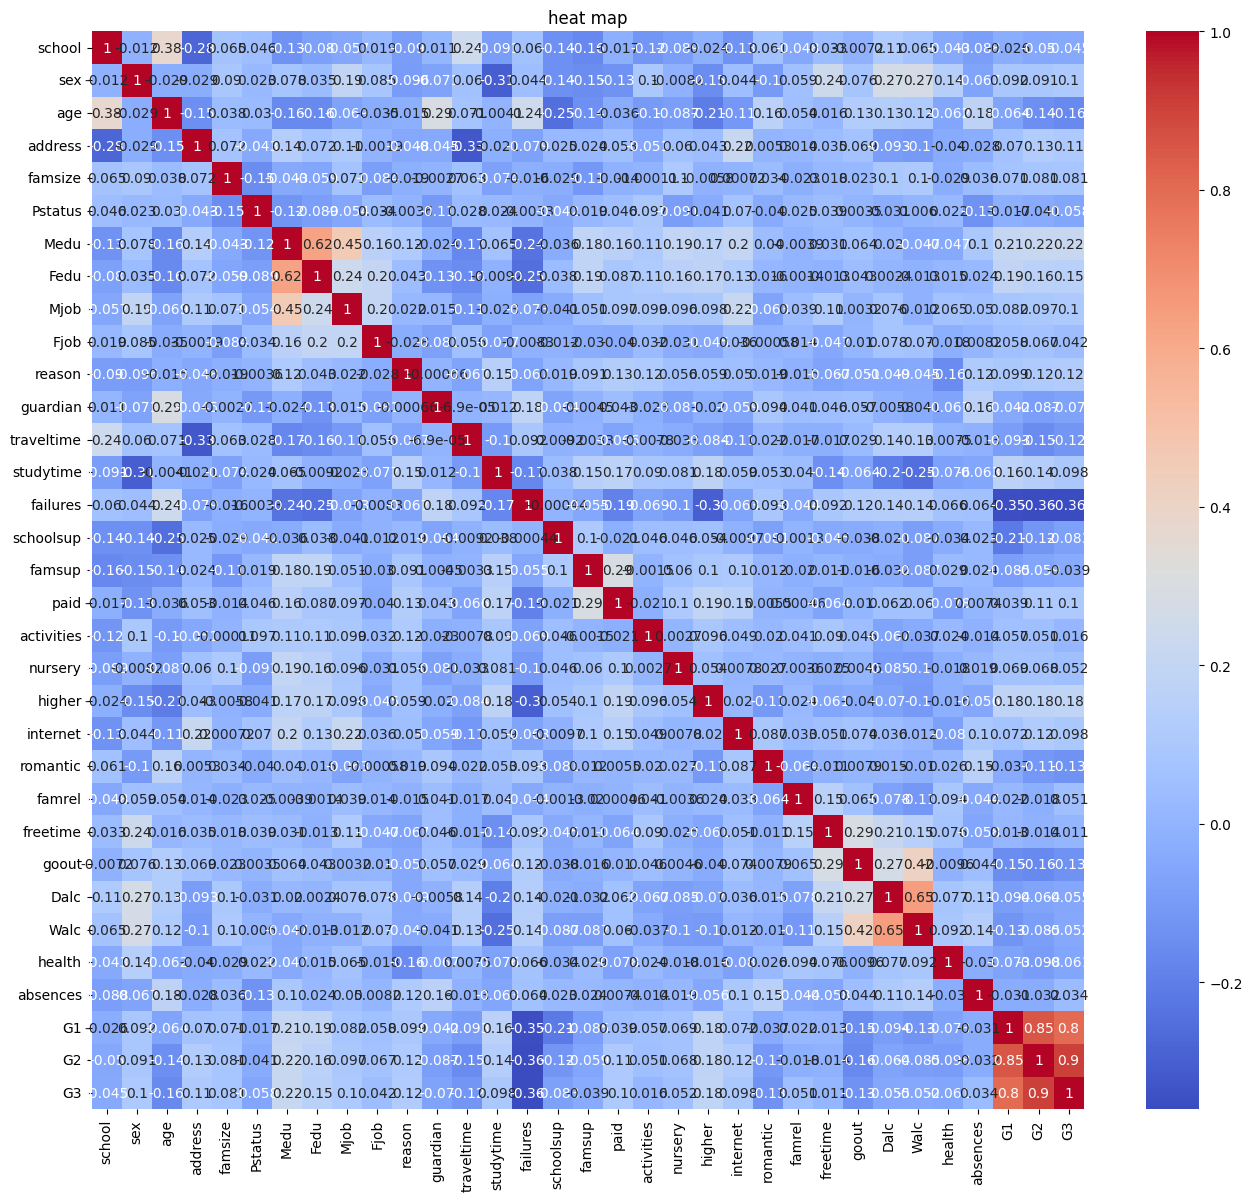

In [13]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("heat map")
plt.show()

In [15]:
numerical_features=df.select_dtypes(include=['number']).columns
x=df[numerical_features]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

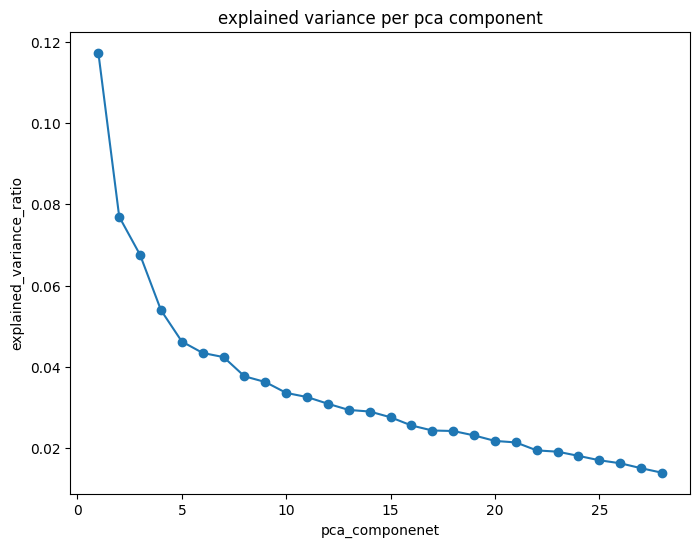

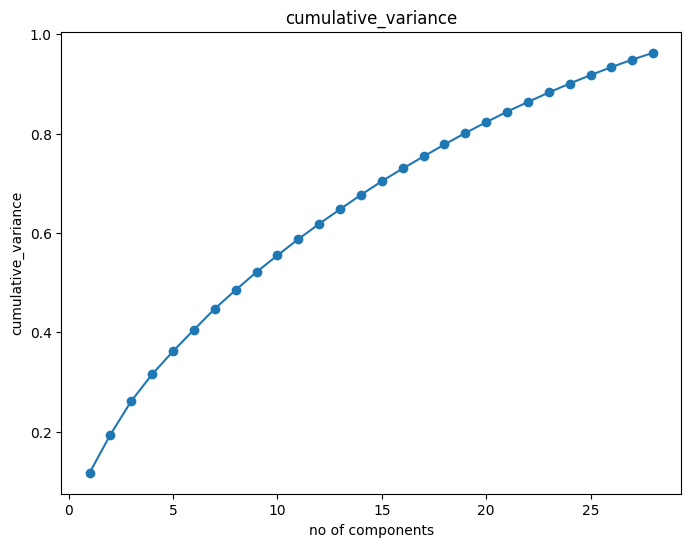

In [62]:
import numpy as np
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(x_scaled)
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8,6))
plt.plot(range(1,len(explained_variance_ratio)+1),explained_variance_ratio,marker='o')
plt.title("explained variance per pca component")
plt.xlabel("pca_componenet")
plt.ylabel("explained_variance_ratio")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance,marker='o')
plt.title("cumulative_variance")
plt.xlabel("no of components")
plt.ylabel("cumulative_variance")
plt.show()

In [63]:
pca_frame=pd.DataFrame(x_pca,columns=[f'pca{i+1}' for i in range(x_pca.shape[1])])
print(pca_frame.head())
eigen_values=pca.explained_variance_
eigen_vectors=pca.components_
print(eigen_values)
print(eigen_vectors)

       pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -1.438593 -1.488462 -1.352740 -0.365869 -0.005932  2.265181 -2.282014   
1 -2.254633 -2.618965 -0.044227 -1.610585  0.511222 -1.312313  0.575185   
2 -2.220288 -1.544912 -0.152916 -0.306844  0.988960 -2.461875 -2.447278   
3  2.712318 -1.692192 -0.028637  0.399934 -0.294049  0.156818  0.166693   
4  0.223982 -1.620790 -0.894775 -1.163171 -0.980036  0.030665 -0.566957   

       pca8      pca9     pca10  ...     pca19     pca20     pca21     pca22  \
0 -1.622866 -0.095293 -2.074322  ... -0.480875 -0.233305 -0.608535 -0.264818   
1  0.925286 -1.442410 -0.699430  ...  0.544373  0.898594  0.306594 -1.073007   
2  0.394954  0.722180  0.055131  ... -0.973407 -0.901005  0.255790  1.883226   
3  1.131271 -0.285884  0.397810  ... -0.570550 -0.708450 -0.210811  0.324562   
4 -0.509118 -1.549557 -0.819965  ... -0.955779  0.304183  0.493847 -0.974142   

      pca23     pca24     pca25     pca26     pca27     pca28  
0  0

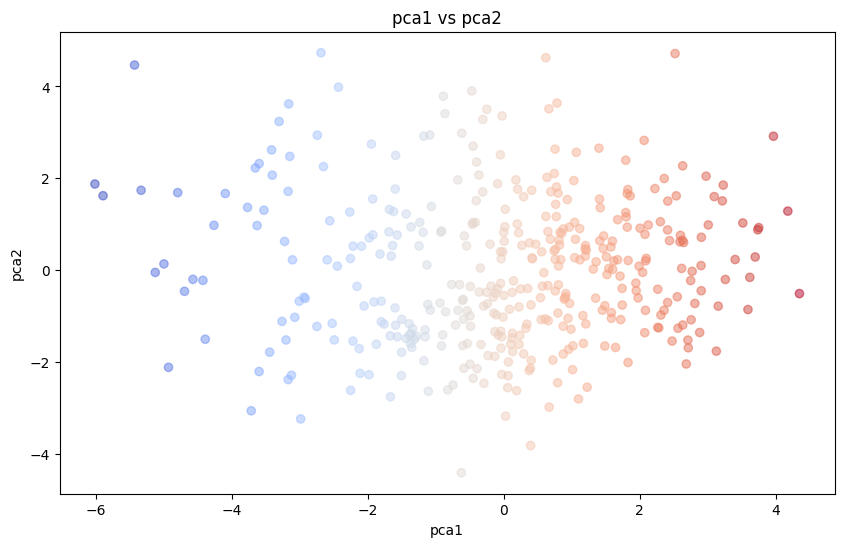

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.5,c=x_pca[:,0],cmap="coolwarm")
plt.title("pca1 vs pca2")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

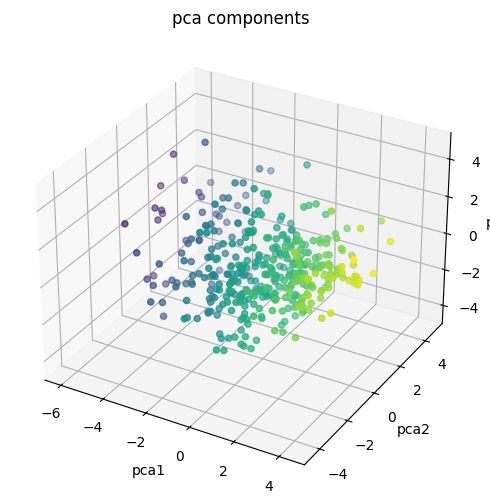

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=x_pca[:,0],cmap="viridis")
ax.set_title("pca components")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
plt.show()

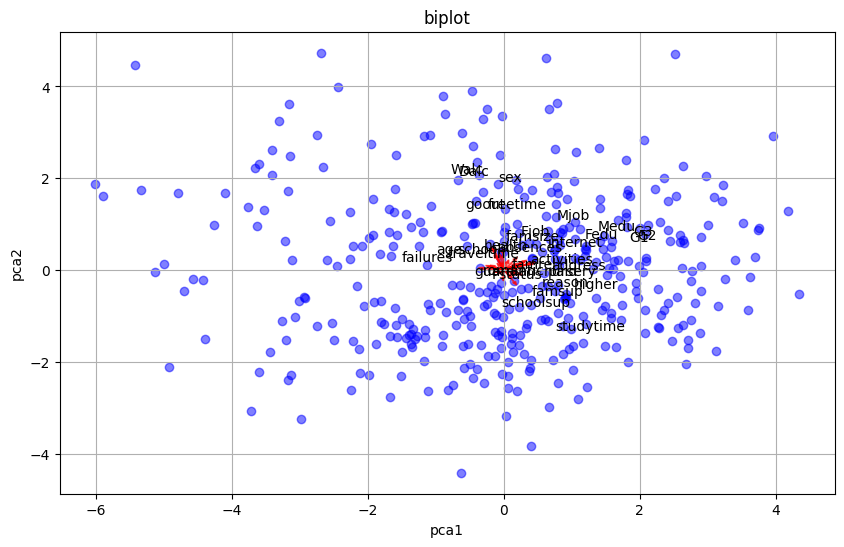

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.5,color='blue')

components=pca.components_.T
for i , feature in enumerate(numerical_features):
    plt.arrow(0,0,components[i,0],components[i,1],color='red',alpha=0.7,head_width=0.05)
    plt.text(components[i,0]*5,components[i,1]*5,feature,color="black")
plt.title("biplot")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.grid(True)
plt.show()

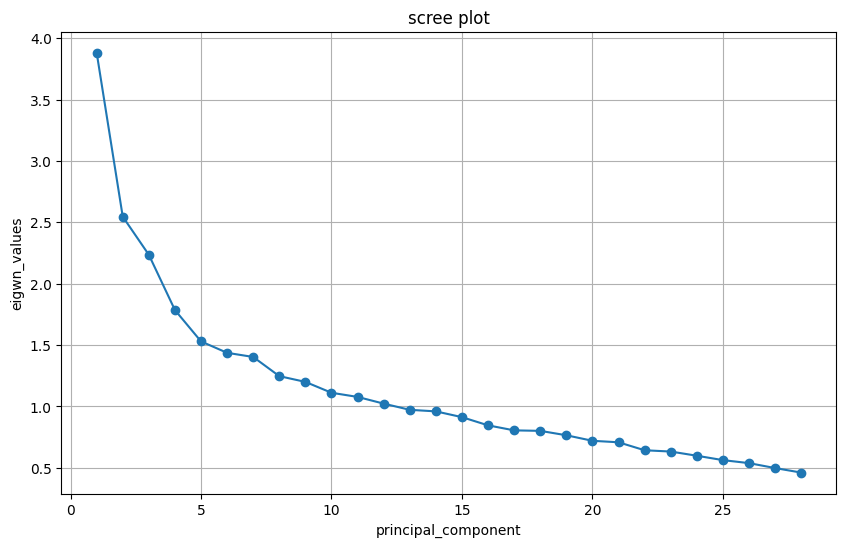

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(eigen_values)+1),eigen_values,marker='o')
plt.title("scree plot")
plt.xlabel("principal_component")
plt.ylabel("eigwn_values")
plt.grid(True)
plt.show()
